# 로지스틱 회귀

#### 시그모이드 함수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

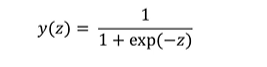

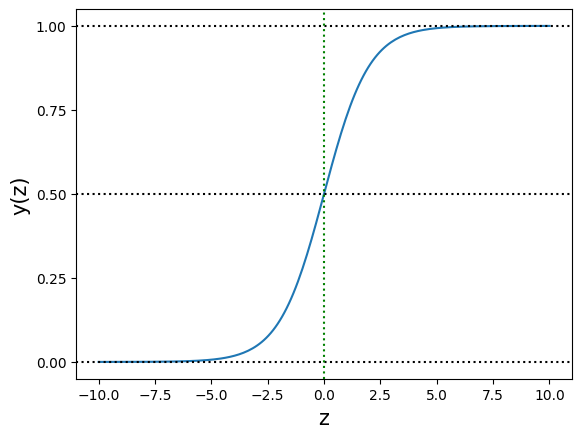

In [4]:
#### 
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
y = sigmoid(z)

plt.plot(z, y)
plt.axhline(y=0, linestyle=':', color='k')
plt.axhline(y=0.5, linestyle=':', color='k')
plt.axhline(y=1, linestyle=':', color='k')
plt.axvline(x=0, linestyle=':', color='g')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1])
plt.xlabel('z', fontsize=15)
plt.ylabel('y(z)', fontsize=15)
plt.show()

# 1. Logistic Regression : 악성종양 판단, 2진 분류

#### 1. 데이터 수집하기

In [6]:
from sklearn.datasets import load_breast_cancer
b_cancer = load_breast_cancer()
b_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### 2. 데이터 탐색하기

In [8]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [13]:
b_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
print(b_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
b_cancer.target_names # 악의있는, 온화한

array(['malignant', 'benign'], dtype='<U9')

In [11]:
#데이터프레임으로 전환하고, 타겟(class) 추가
cancer_df = pd.DataFrame(b_cancer.data, columns= b_cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
cancer_df['target'] = b_cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [14]:
# 타겟 데이터 분포
cancer_df.diagnosis.value_counts()

AttributeError: 'DataFrame' object has no attribute 'diagnosis'

#### 데이터 준비, 분할 및 표준화(스케일링)하기

In [16]:
from sklearn.model_selection import train_test_split
X = b_cancer.data
y = b_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [17]:
# 스케일링 전 X_train
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.185500,19.192839,92.335503,661.859045,0.096475,0.104080,0.088794,0.049479,0.180698,0.062646,...,16.359621,25.534523,107.736030,894.246985,0.132529,0.253369,0.268531,0.115221,0.289187,0.083718
std,3.598618,4.190476,24.769334,366.558262,0.013916,0.051031,0.078154,0.039216,0.028057,0.006861,...,4.965170,6.147466,34.460647,597.853882,0.022989,0.153653,0.193250,0.065688,0.063439,0.017957
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.032500,75.310000,420.350000,0.086740,0.066805,0.030385,0.020710,0.161525,0.057685,...,13.052500,20.865000,84.122500,516.425000,0.116300,0.148600,0.119100,0.065320,0.247850,0.071462
50%,13.310000,18.725000,86.140000,548.450000,0.096035,0.094035,0.062650,0.033870,0.179150,0.061715,...,14.915000,25.155000,97.455000,682.000000,0.132250,0.216000,0.229850,0.098855,0.280950,0.080075
75%,15.772500,21.597500,104.475000,779.125000,0.105400,0.128750,0.128775,0.075022,0.195400,0.065735,...,19.005000,29.452500,125.775000,1093.250000,0.145275,0.328975,0.378750,0.161300,0.318275,0.091853
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.105000,0.290300,0.663800,0.207500


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# 스케일링 후 X_train_scaled(평균, 표준편차))
pd.options.display.float_format = '{:.3f}'.format
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,...,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.005,-2.266,-1.962,-1.416,-3.155,-1.662,-1.138,-1.263,-2.666,-1.851,...,-1.700,-2.201,-1.666,-1.187,-2.672,-1.473,-1.391,-1.756,-2.094,-1.599
25%,-0.689,-0.755,-0.688,-0.660,-0.700,-0.731,-0.748,-0.735,-0.684,-0.724,...,-0.667,-0.761,-0.686,-0.633,-0.707,-0.683,-0.774,-0.761,-0.652,-0.683
50%,-0.244,-0.112,-0.250,-0.310,-0.032,-0.197,-0.335,-0.399,-0.055,-0.136,...,-0.291,-0.062,-0.299,-0.355,-0.012,-0.244,-0.200,-0.249,-0.130,-0.203
75%,0.442,0.575,0.491,0.320,0.642,0.484,0.512,0.652,0.525,0.451,...,0.533,0.638,0.524,0.333,0.555,0.493,0.571,0.702,0.459,0.454
max,3.874,3.493,3.887,5.024,3.470,4.068,4.330,3.874,4.400,5.077,...,3.969,3.910,4.168,5.627,3.923,5.243,4.334,2.669,5.912,6.902


#### 로지스틱 모델 구축

In [46]:
#1)모델 생성
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
#2) 모델 훈련
Lr.fit(X_train_scaled,y_train)
#3) 평가 데이터에 대한 예측 수행
y_pred = Lr.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [48]:
X_test_scaled.shape

(171, 30)

In [49]:
np.set_printoptions(suppress=True)
Lr.predict_proba(X_test_scaled) # 0일 확률, 1일 확률 첫번째꺼 그래서 0으로 나옴!

array([[0.99860254, 0.00139746],
       [0.04003841, 0.95996159],
       [0.00136872, 0.99863128],
       [0.01038683, 0.98961317],
       [0.000293  , 0.999707  ],
       [0.00595696, 0.99404304],
       [0.00017142, 0.99982858],
       [0.00172762, 0.99827238],
       [0.00008372, 0.99991628],
       [0.00000233, 0.99999767],
       [0.19447641, 0.80552359],
       [0.07446842, 0.92553158],
       [0.00001664, 0.99998336],
       [0.46612935, 0.53387065],
       [0.41334862, 0.58665138],
       [0.99582419, 0.00417581],
       [0.00607554, 0.99392446],
       [0.99999531, 0.00000469],
       [0.99990375, 0.00009625],
       [1.        , 0.        ],
       [0.9984793 , 0.0015207 ],
       [0.97978704, 0.02021296],
       [0.01999415, 0.98000585],
       [0.00126674, 0.99873326],
       [0.99909784, 0.00090216],
       [0.00078892, 0.99921108],
       [0.00005928, 0.99994072],
       [0.97233473, 0.02766527],
       [0.00174188, 0.99825812],
       [0.99999628, 0.00000372],
       [0.

#### 생성한 모델 성능 지표 확인하기

In [29]:
#오차행렬
Lr.decision_function(X_test_scaled) # 1/e^-6.5, 1/e^3.17, 1/e^6.5925 ...
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # 정확도 = 167/171, 정밀도=107/108, 재현도=107/110

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [32]:
#정확도, 재현율, 정밀도 지표확인
167/171, 107/108, 107/110

(0.9766081871345029, 0.9907407407407407, 0.9727272727272728)

In [36]:
from sklearn.metrics import accuracy_score, precision_score ,recall_score

print(accuracy_score(y_test, y_pred), precision_score(y_test,y_pred),recall_score(y_test,y_pred))

0.9766081871345029 0.9727272727272728 0.9907407407407407


In [51]:
from sklearn.metrics import f1_score, roc_auc_score
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test, Lr.predict_proba(X_test_scaled)[:,1]) # 1이 될 확률, 0이될 확률
print(f1,roc_auc)

0.981651376146789 0.9939741328630218


# 2. Logistic Regression: 붓꽃 데이터 , 다중 분류

#### 데이터 수집하기

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### 데이터 탐색하기

In [55]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
#데이터프레임으로 전환하고, 타겟(class) 추가하되 범주형으로 추가 
iris_df['species'] = pd.Series(iris.target, dtype='category') # 시리즈로 만든 다음 카테고리로 바꿈!
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [ ]:
#데이터프레임으로 전환하고, 타겟(class) 추가하되 범주형으로 추가 


In [ ]:
#데이터셋의 크기, 독립변수 X의 피처 정보 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris_df, hue='species');
# hue 옵션을 주면, 첫번째 그림이 
#히스토그램에서 커널 밀도 추정(KDE) 그래프로 변경됨

In [ ]:
# 3종류인것을 추측 가능

#### 데이터 준비, 분할, 전처리

In [60]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.100,3.500,1.400,0.200,0
1,4.900,3.000,1.400,0.200,0
2,4.700,3.200,1.300,0.200,0
3,4.600,3.100,1.500,0.200,0
4,5.000,3.600,1.400,0.200,0


In [ ]:
# X, y 설정하기
X= iris.data
y=iris.target


# 데이터 분할: 붓꽃의 타겟 데이터가 
# 테스트 세트도 훈련 세트와 동일한 비율로 들어갈 수 있도록 
# 분할시 stratify옵션을 준다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=210,stratify=iris.target) # stratify 타겟데이터를 동일하게 분포해서 나누게 함!
# 훈련데이터, 테스트 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 로지스틱 모델 구축

In [ ]:
# 로지스틱 회귀 객체 생성
# 꽃의 종류가 3가지(이진 분류가 아님, solver, multiclass option을 주는 이유)



# 테스트 데이터를 모델에 적용하여 y_pred 구하기


#### 모델의 성능 지표 확인

In [ ]:

#오차행렬

#정확도, 정밀도, 재현율 지표확인
